In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [2]:
#Load the dataset
digits = load_digits()

# Dataset information
print(f"Dataset Description: {digits.DESCR[:500]}...")
print(f"Image data shape: {digits.images.shape}")
print(f"Number of labels: {len(np.unique(digits.target))}")


Dataset Description: .. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci...
Image data shape: (1797, 8, 8)
Number of labels: 10


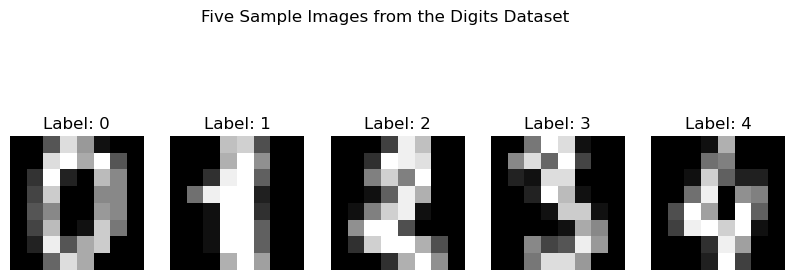

In [3]:
# Visualizaiton of sample images
fig, axes = plt.subplots(1, 5, figsize=(10, 4))
for ax, image, label in zip(axes, digits.images[:5], digits.target[:5]):
    ax.imshow(image, cmap='gray')
    ax.set_title(f"Label: {label}")
    ax.axis('off')
plt.suptitle("Five Sample Images from the Digits Dataset")
plt.show()

In [4]:
# Flatten the image data
X = digits.images.reshape((len(digits.images), -1))
y = digits.target

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

# Possible test sizes
test_sizes = [0.2, 0.3]
results = []

# Loop through each test size and evaluating model performance
for test_size in test_sizes:
    print(f"\nEvaluating model with test_size={test_size}...")

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    # GridSearchCV with valid combinations
    param_grid = [
        {'penalty': ['l2', 'none'], 'solver': ['lbfgs', 'newton-cg'], 'C': [0.1, 1, 10, 100], 'max_iter': [100, 500, 1000]},
        {'penalty': ['l1'], 'solver': ['liblinear'], 'C': [0.1, 1, 10, 100], 'max_iter': [100, 500, 1000]},
        {'penalty': ['l1', 'l2', 'elasticnet', 'none'], 'solver': ['saga'], 'C': [0.1, 1, 10, 100], 'max_iter': [100, 500, 1000]},
    ]

    grid_search = GridSearchCV(
        estimator=LogisticRegression(multi_class='auto'),
        param_grid=param_grid,
        cv=5,
        scoring='accuracy',
        n_jobs=-1,
        verbose=1
    )

    grid_search.fit(X_train, y_train)

    # Best model and evaluation
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)

    # Accuracy
    train_accuracy = grid_search.score(X_train, y_train)
    test_accuracy = accuracy_score(y_test, y_pred)
    results.append((test_size, train_accuracy, test_accuracy))

    print(f"Train Accuracy: {train_accuracy:.2f}, Test Accuracy: {test_accuracy:.2f}")



Evaluating model with test_size=0.2...
Fitting 5 folds for each of 108 candidates, totalling 540 fits


C:\Users\srinivasareddyb\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
60 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\srinivasareddyb\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\srinivasareddyb\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1291, in fit
    fold_coefs_ = Parallel(n_jobs=self.n_jobs, verbose=self.verbose, prefer=prefer)(
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  Fi

Train Accuracy: 0.98, Test Accuracy: 0.96

Evaluating model with test_size=0.3...
Fitting 5 folds for each of 108 candidates, totalling 540 fits


C:\Users\srinivasareddyb\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
60 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\srinivasareddyb\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\srinivasareddyb\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1291, in fit
    fold_coefs_ = Parallel(n_jobs=self.n_jobs, verbose=self.verbose, prefer=prefer)(
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  Fi

Train Accuracy: 1.00, Test Accuracy: 0.97


C:\Users\srinivasareddyb\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [9]:
# Best test size and accuracy
best_test_size = max(results, key=lambda x: x[2])  # Select based on test accuracy
print(f"\nBest test_size: {best_test_size[0]} with Test Accuracy: {best_test_size[2]:.2f}")


Best test_size: 0.3 with Test Accuracy: 0.97


In [10]:
# Model with the best test size
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=best_test_size[0], random_state=42)

In [11]:
# Fitting the best model again for final evaluation
final_model = LogisticRegression(multi_class='auto', **grid_search.best_params_)
final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)

C:\Users\srinivasareddyb\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


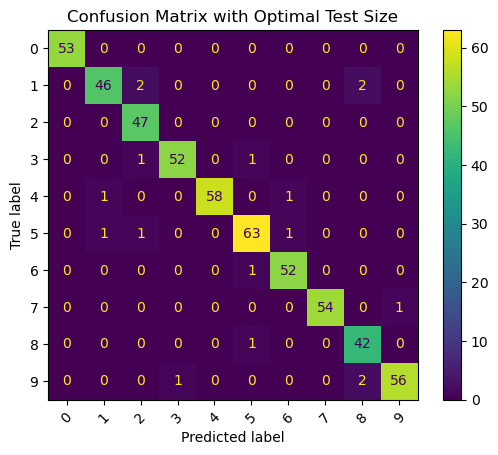

In [12]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(conf_matrix, display_labels=digits.target_names).plot(cmap='viridis', xticks_rotation=45)
plt.title("Confusion Matrix with Optimal Test Size")
plt.show()

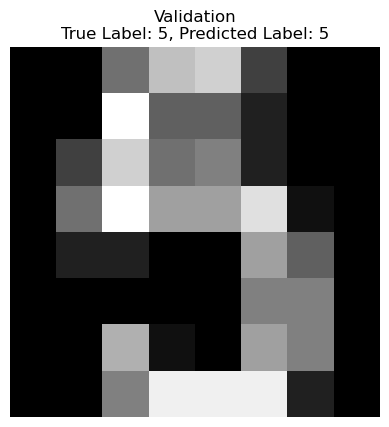

In [23]:
# Validate prediction with a sample image
sample_index = 234  # Change this index to validate other samples
sample_image = X_test[sample_index].reshape(8, 8)
predicted_label = final_model.predict([X_test[sample_index]])[0]
true_label = y_test[sample_index]

plt.imshow(sample_image, cmap='gray')
plt.title(f"Validation\nTrue Label: {true_label}, Predicted Label: {predicted_label}")
plt.axis('off')
plt.show()

In [24]:
# Results summary
print("\nResults for all test sizes:")
for test_size, train_acc, test_acc in results:
    print(f"Test Size: {test_size}, Train Accuracy: {train_acc:.2f}, Test Accuracy: {test_acc:.2f}")


Results for all test sizes:
Test Size: 0.2, Train Accuracy: 0.98, Test Accuracy: 0.96
Test Size: 0.3, Train Accuracy: 1.00, Test Accuracy: 0.97
